In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import IPython.display as ipd
import tensorflow 
from keras.utils import to_categorical
import librosa


In [42]:
s =os.listdir("D:\\voise\TESS_Toronto_emotional_speech_set_data")

In [43]:
print(s)

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [44]:
#how to get lable and path at the same time 
path=[]
labels=[]
for dirname, _, filenames in os.walk("D:\\voise\TESS_Toronto_emotional_speech_set_data"):
    for filename in filenames:
       path.append(os.path.join(dirname, filename))
       label = filename.split("_")[-1]
       labels.append(label.split(".")[0].lower())

In [45]:
label

'sad.wav'

In [46]:
df =pd.DataFrame()
df["speech"]=path
df["labels"]=labels

In [47]:
df["labels"].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

In [48]:
df["labels"].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: labels, dtype: int64

In [49]:
def waveplot(data , sr , emotion):
    plt.figure(figsize=(10,5))
    plt.title(emotion ,size=20)
    librosa.display.waveshow(data , sr=sr)
    plt.show()
    

In [50]:
def spec(data , sr , emotion):
    x= librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,5))
    plt.title(emotion ,size=20)
    librosa.display.specshow(xdb,sr=sr , x_axis="time" , y_axis="hz")
    plt.colorbar()

In [51]:
type(df["speech"])

pandas.core.series.Series

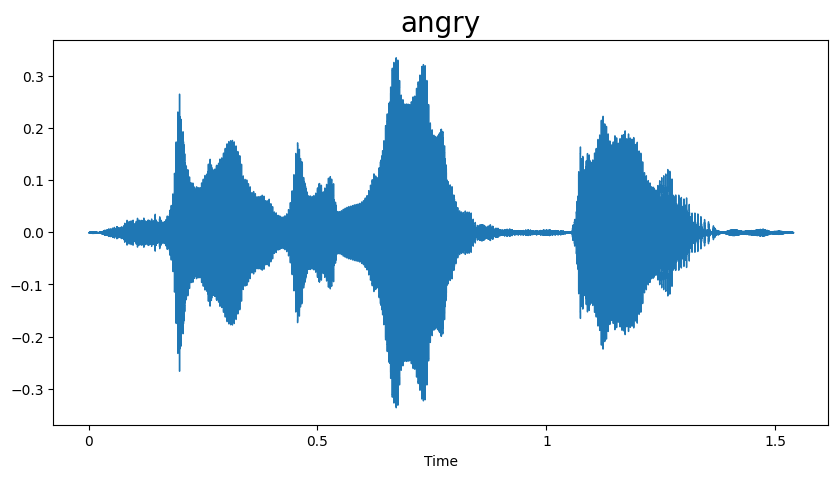

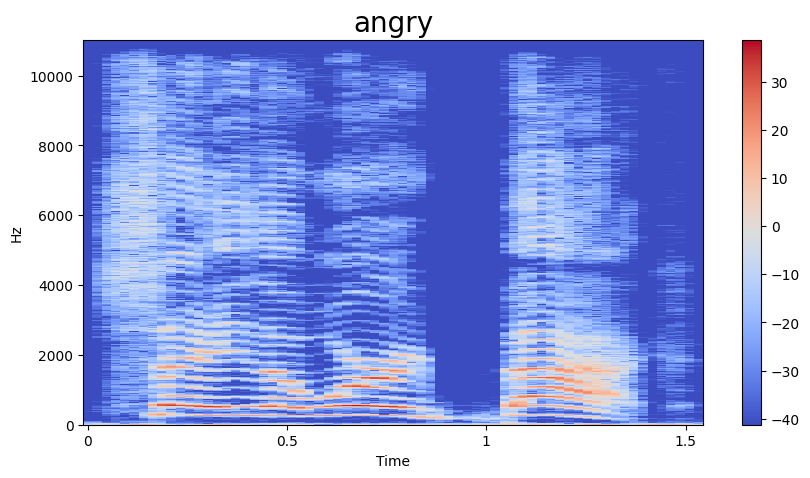

In [52]:
emotion = "angry"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(str(path))
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)


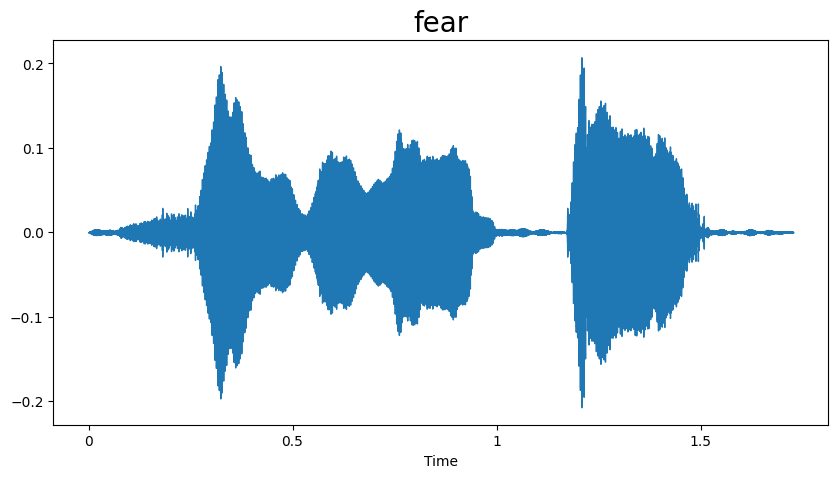

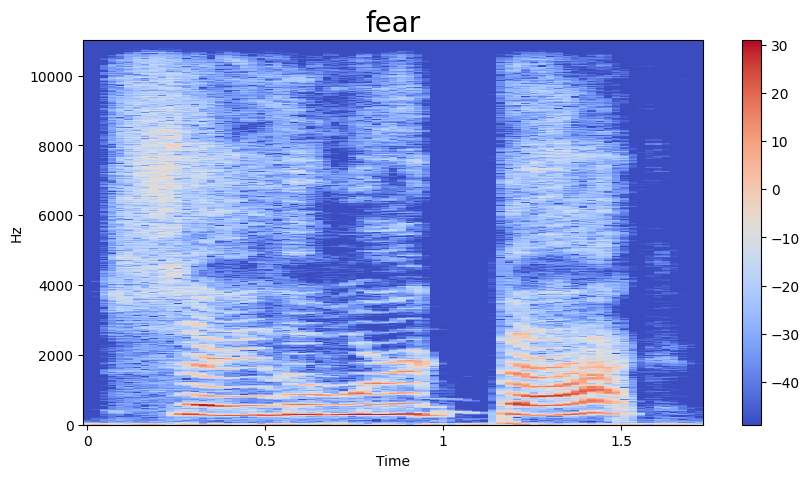

In [53]:
emotion = "fear"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)

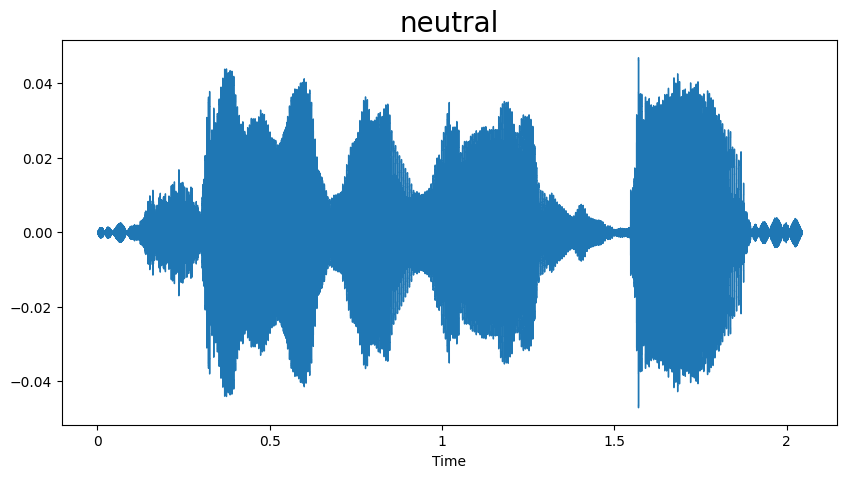

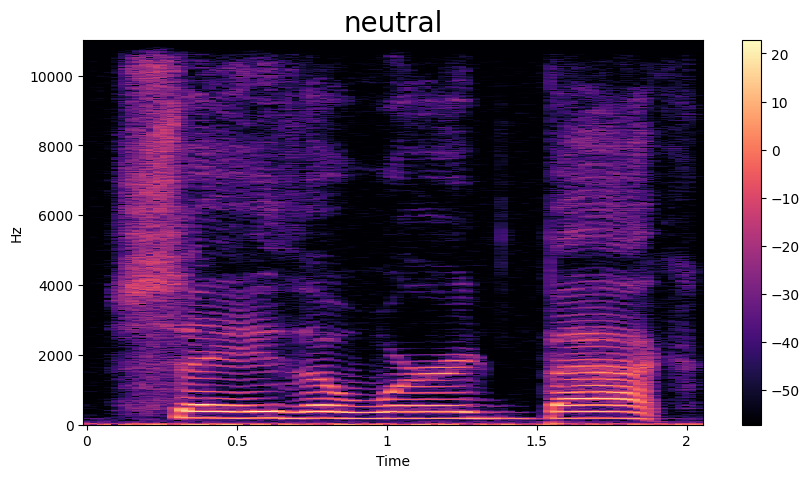

In [54]:
emotion = "neutral"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)

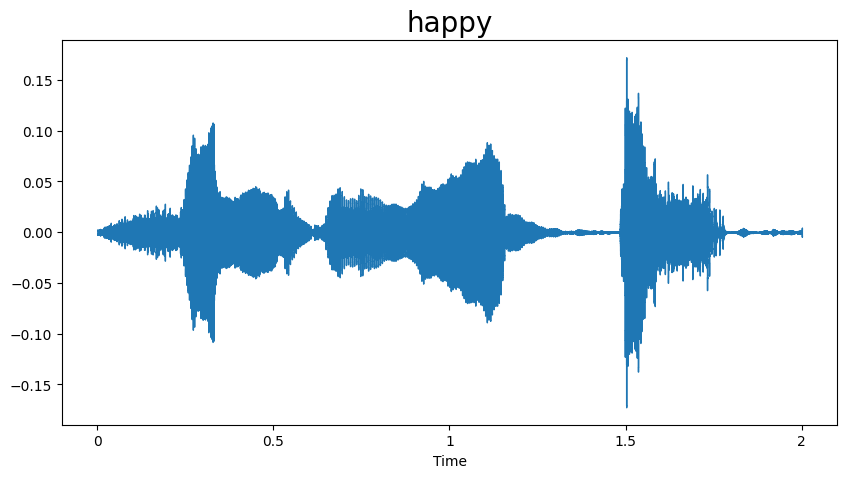

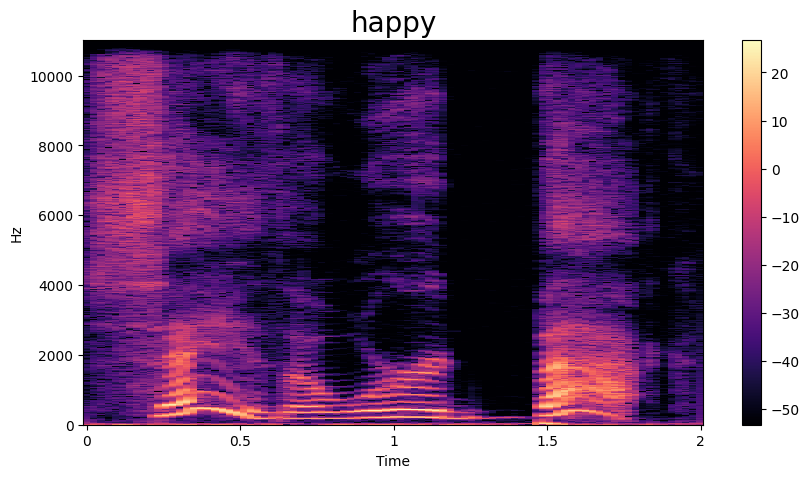

In [55]:
emotion = "happy"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)

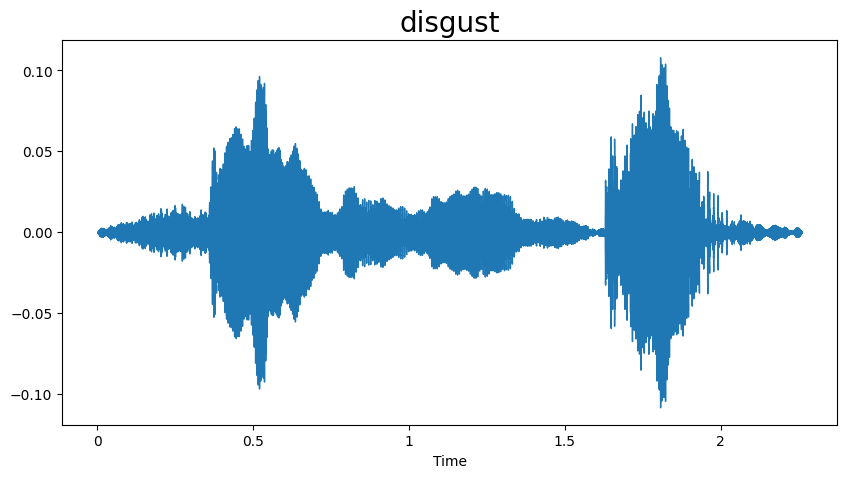

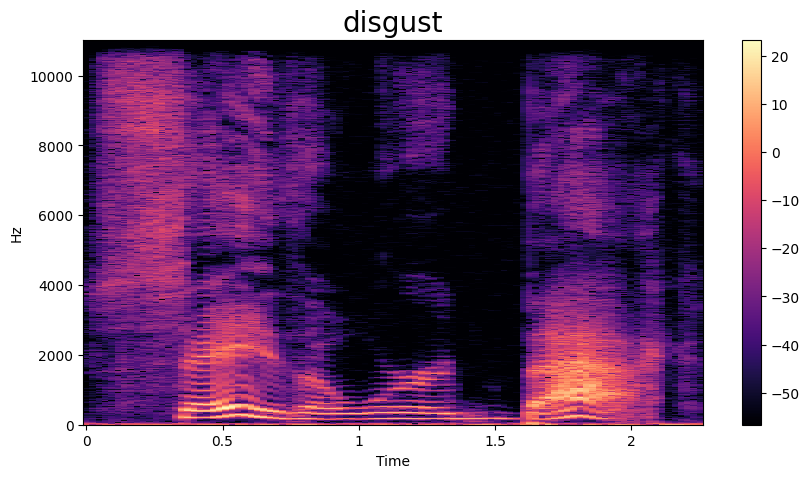

In [56]:
emotion = "disgust"
ipd.Audio(path)
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)

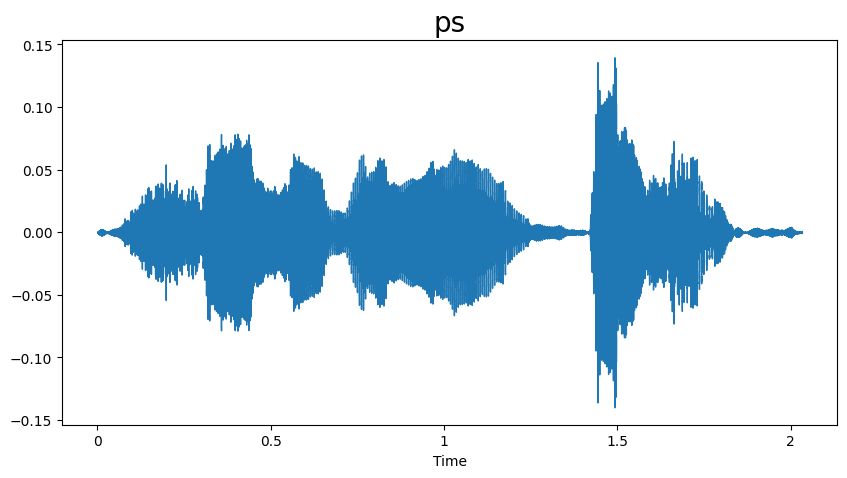

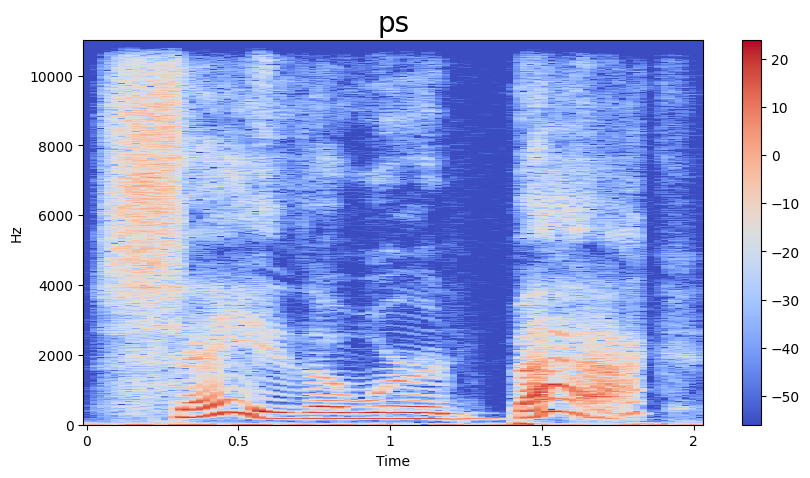

In [57]:
emotion = "ps"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)

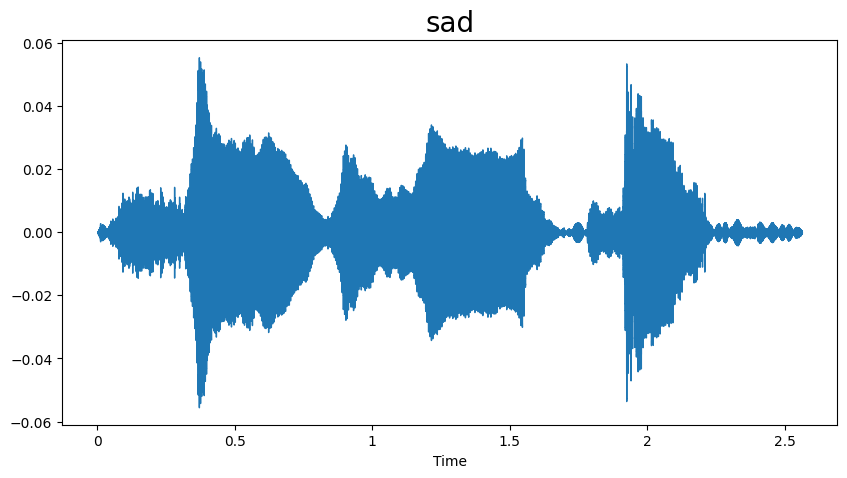

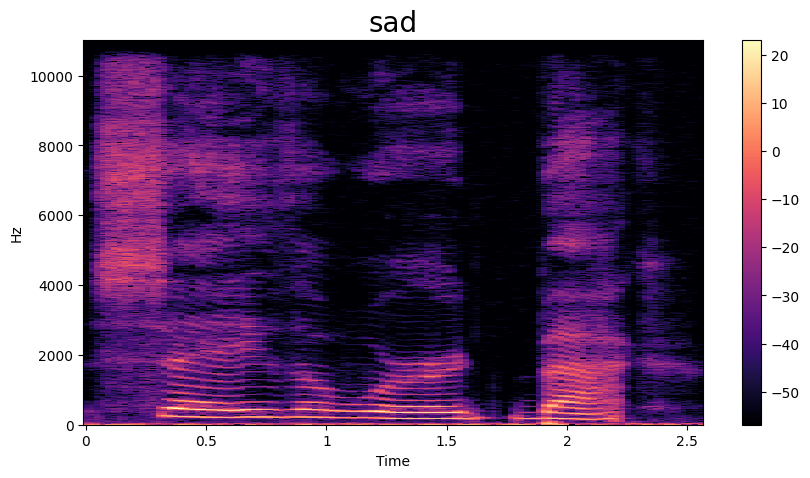

In [58]:
emotion = "sad"
path =df["speech"][df["labels"]==emotion].iloc[0]
data , sample_rate = librosa.load(path)
waveplot(data , sample_rate , emotion)
spec(data , sample_rate , emotion)
ipd.Audio(path)

In [59]:
def extract_feature (filename):
    y , sr  = librosa.load(filename , duration=3 , offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y , sr=sr , n_mfcc=40).T , axis=0)
    return mfcc

In [60]:
X_mfcc = df['speech'].apply(lambda x: extract_feature(x))

In [61]:
np.array(X_mfcc).shape

(2800,)

In [62]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
enc = OneHotEncoder()
y = enc.fit_transform(np.array(df['labels']).reshape(-1,1)).toarray()

In [65]:
y.shape

(2800, 7)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [67]:
x_train.shape

(2240, 40)

In [68]:
x_train[1]

array([-4.5211636e+02,  5.3300808e+01,  1.0729263e+01, -9.2449102e+00,
        6.1908817e+00,  1.0014908e+01, -5.0579042e+00, -1.2451234e+01,
       -2.0649717e+01, -4.6079941e+00, -2.3592310e+01, -3.6541531e+00,
       -9.5200890e-01, -4.4917297e+00, -6.1724997e-01,  2.5919371e+00,
       -2.2044477e+00,  1.0752965e+01,  2.9197643e+00,  1.4026486e+01,
        1.5351762e+01,  2.4504454e+01,  2.5321091e+01,  2.2223518e+01,
        1.0890412e+01,  6.0339622e+00, -2.8849127e+00,  4.3531647e+00,
        4.6747618e+00,  3.8494384e+00, -1.1381305e+00, -4.1336436e+00,
       -2.8583155e+00,  1.9793282e-01,  1.4745275e+00, -1.7467455e+00,
       -4.4597239e+00,  1.1997656e+00, -1.8246298e+00,  3.8062303e+00],
      dtype=float32)

In [69]:
x_test[100]

array([-3.45053589e+02,  6.55142975e+01, -1.47457943e+01,  1.66302109e+01,
       -1.28004589e+01, -4.57058382e+00, -5.54914665e+00, -8.07413578e+00,
       -8.23466778e+00, -2.09129667e+00, -1.62375813e+01,  6.96394110e+00,
       -9.33179188e+00,  5.80399799e+00,  6.83886719e+00, -1.80331945e+00,
        5.86379576e+00,  3.91313672e+00, -1.82022065e-01,  2.07779813e+00,
       -4.16550636e+00,  2.62537479e+00, -4.48026848e+00,  5.03060400e-01,
       -1.33189094e+00, -2.14197487e-01,  2.93307185e+00,  4.07223225e+00,
        4.67755842e+00,  8.87947559e+00,  4.22563457e+00,  1.07622385e+01,
        3.95362735e+00,  5.88367605e+00,  5.11730433e+00,  5.20120144e+00,
        5.59815645e+00,  4.46291304e+00,  3.82650113e+00,  3.36771822e+00],
      dtype=float32)

In [70]:
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout
from keras.utils import to_categorical
import tensorflow as tf

In [71]:
x_train = np.expand_dims(x_train , -1)
x_train.shape

(2240, 40, 1)

In [72]:
y_train.shape

(2240, 7)

In [73]:
y_test.shape

(560, 7)

In [74]:
x_test.shape

(560, 40)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(10000, return_sequences=False, input_shape=(x_train.shape[1],1)),
    Dense(168, activation='relu'),
    Dropout(0.2),
    Dense(68, activation='relu'),
    Dropout(0.2),
    Dense(60 , activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile( optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )
model.summary()

In [ ]:
len(model.weights)

11

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=10)

Epoch 1/50
224/224 [==============================] - 11s 33ms/step - loss: 1.0667 - accuracy: 0.5799 - val_loss: 0.5817 - val_accuracy: 0.7911
Epoch 2/50
224/224 [==============================] - 6s 28ms/step - loss: 0.4633 - accuracy: 0.8438 - val_loss: 0.2959 - val_accuracy: 0.9000
Epoch 3/50
224/224 [==============================] - 6s 28ms/step - loss: 0.3279 - accuracy: 0.9049 - val_loss: 0.2483 - val_accuracy: 0.9107
Epoch 4/50
224/224 [==============================] - 6s 28ms/step - loss: 0.2497 - accuracy: 0.9308 - val_loss: 0.1472 - val_accuracy: 0.9500
Epoch 5/50
224/224 [==============================] - 6s 29ms/step - loss: 0.1924 - accuracy: 0.9393 - val_loss: 0.1213 - val_accuracy: 0.9625
Epoch 6/50
224/224 [==============================] - 7s 29ms/step - loss: 0.1495 - accuracy: 0.9554 - val_loss: 0.1504 - val_accuracy: 0.9536
Epoch 7/50
224/224 [==============================] - 6s 29ms/step - loss: 0.1737 - accuracy: 0.9513 - val_loss: 0.1092 - val_accuracy: 0.966

In [ ]:
model.save("model_001.h5")

KeyError: 'recall'

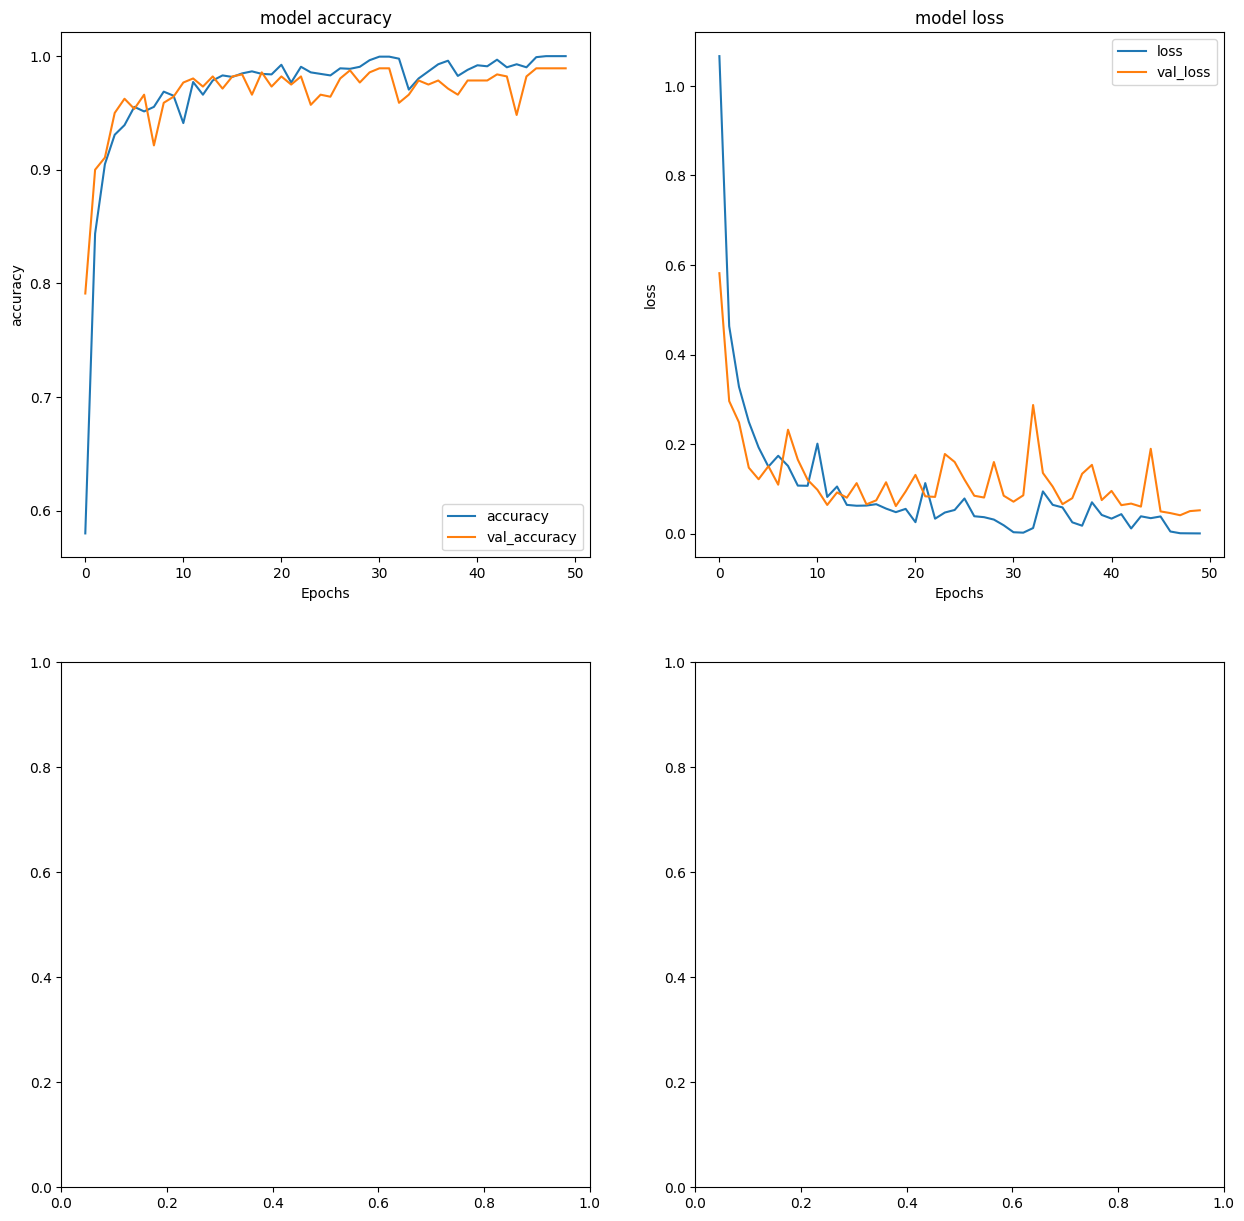

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

metrics = ['accuracy', 'loss', 'recall', 'precision']

for i, metric in enumerate(metrics):
    ax = axs.reshape(-1)[i]
    ax.plot(history.history[metric], label=metric)
    ax.plot(history.history['val_'+metric], label='val_'+metric)
    ax.set_title('model '+metric)
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric)
    ax.legend()

plt.show()

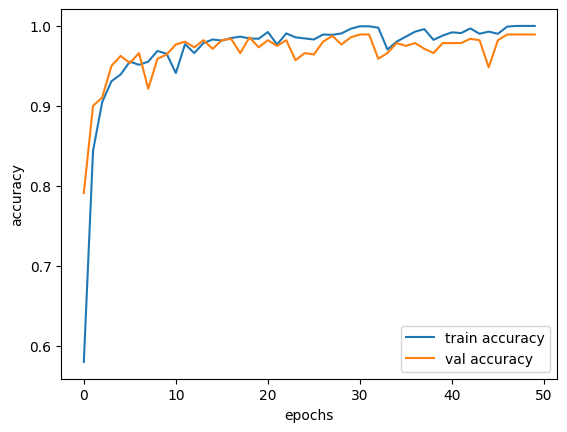

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()